## Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset 
df = pd.read_csv("C:/Users/Dell/OneDrive/Desktop/Project/personality_synthetic_dataset.csv")


In [5]:
# Show basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   personality_type          20000 non-null  object 
 1   social_energy             20000 non-null  float64
 2   alone_time_preference     20000 non-null  float64
 3   talkativeness             20000 non-null  float64
 4   deep_reflection           20000 non-null  float64
 5   group_comfort             20000 non-null  float64
 6   party_liking              20000 non-null  float64
 7   listening_skill           20000 non-null  float64
 8   empathy                   20000 non-null  float64
 9   creativity                20000 non-null  float64
 10  organization              20000 non-null  float64
 11  leadership                20000 non-null  float64
 12  risk_taking               20000 non-null  float64
 13  public_speaking_comfort   20000 non-null  float64
 14  curios

In [6]:
# Class distribution of personality type
print(df["personality_type"].value_counts())


personality_type
Extrovert    6857
Ambivert     6573
Introvert    6570
Name: count, dtype: int64


C:\Users\Dell\AppData\Local\Temp\ipykernel_1412\3300780363.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="personality_type", palette="Set2")


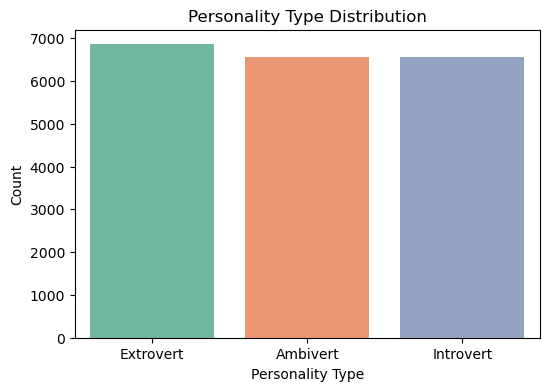

In [7]:
# Plot the distribution of the target class
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="personality_type", palette="Set2")
plt.title("Personality Type Distribution")
plt.xlabel("Personality Type")
plt.ylabel("Count")
plt.show()

In [8]:
# Check for missing values
print(df.isnull().sum())

personality_type            0
social_energy               0
alone_time_preference       0
talkativeness               0
deep_reflection             0
group_comfort               0
party_liking                0
listening_skill             0
empathy                     0
creativity                  0
organization                0
leadership                  0
risk_taking                 0
public_speaking_comfort     0
curiosity                   0
routine_preference          0
excitement_seeking          0
friendliness                0
emotional_stability         0
planning                    0
spontaneity                 0
adventurousness             0
reading_habit               0
sports_interest             0
online_social_usage         0
travel_desire               0
gadget_usage                0
work_style_collaborative    0
decision_speed              0
stress_handling             0
dtype: int64


## Data Preprocessing

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [10]:
# Encode target variable
le = LabelEncoder()
df['personality_type_encoded'] = le.fit_transform(df['personality_type'])

In [11]:
# Separate features and target
X = df.drop(columns=['personality_type', 'personality_type_encoded'])
y = df['personality_type_encoded']


In [12]:
# Scale Feautres
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# Print Shape
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (16000, 29)
Test shape: (4000, 29)


## Model Training and Evaluation

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [18]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [19]:
# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

#### Evaluate all Models

In [20]:
print(" Logistic Regression ")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

 Logistic Regression 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1315
           1       1.00      1.00      1.00      1371
           2       1.00      1.00      1.00      1314

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

[[1313    1    1]
 [   3 1368    0]
 [   3    0 1311]]


In [21]:
print(" Random Forest ")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


 Random Forest 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1315
           1       1.00      0.99      1.00      1371
           2       1.00      1.00      1.00      1314

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

[[1310    2    3]
 [   8 1363    0]
 [   5    0 1309]]


In [22]:
print(" SVM ")
print(classification_report(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))

 SVM 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1315
           1       1.00      1.00      1.00      1371
           2       1.00      1.00      1.00      1314

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

[[1313    1    1]
 [   3 1368    0]
 [   1    0 1313]]


## Exporting Data for PowerBI visualization


In [23]:
# Re-attach the original personality_type column and predictions
df_export = pd.DataFrame(X_scaled, columns=X.columns)
df_export['personality_type'] = df['personality_type']
df_export['personality_type_encoded'] = df['personality_type_encoded']

In [24]:
# Include predicted labels from best model (e.g., SVM)
df_export['predicted'] = SVC().fit(X_train, y_train).predict(X_scaled)

In [25]:
# Export to CSV
df_export.to_csv("personality_export_for_powerbi.csv", index=False)
print("Exported to personality_export_for_powerbi.csv")

Exported to personality_export_for_powerbi.csv


 ## HeatMap Creation

In [26]:
# Drop non-numeric columns for correlation
traits_only = df_export.drop(columns=['personality_type', 'personality_type_encoded', 'predicted'])

In [28]:
# Compute correlation matrix
corr_matrix = traits_only.corr()

In [29]:
# Save to CSV for Power BI
corr_matrix.to_csv("trait_correlations.csv")
print("Correlation matrix saved to trait_correlations.csv")

Correlation matrix saved to trait_correlations.csv
